In [498]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Task 2: For the given adult.csv dataset, perform below operations.**

### **•	Upload data set into the dataframe**

In [499]:
adult = pd.read_csv("/content/adultPrac7.csv")
adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### **•	Check the shape of the data set.**

In [500]:
adult.shape

(8890, 15)

### **•	Find out all the categorical columns from the data set**

In [501]:
adult.select_dtypes(include=["object"]).columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

### **•	Check if null values exist in all the categorical columns**

In [502]:
adult.select_dtypes(include=["object"]).isna().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               1
native_country    1
income            1
dtype: int64

### **•	Identify the problems with “workclass”, “Occupation”,”native_country” columns and rectify it.**

In [503]:
adult.isin([' ?']).sum()

age                 0
workclass         525
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        526
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    162
income              0
dtype: int64

In [504]:
import numpy as np

adult[["workclass", "occupation", "native_country"]] = adult[["workclass", "occupation", "native_country"]].replace(' ?', np.nan)

In [505]:
adult.isna().sum()

age                 0
workclass         525
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        526
relationship        0
race                0
sex                 1
capital_gain        1
capital_loss        1
hours_per_week      1
native_country    163
income              1
dtype: int64

### **•	Explore numeric columns and check any null values exist for the numeric columns.**

In [506]:
adult.select_dtypes(exclude=["object"]).isna().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      1
capital_loss      1
hours_per_week    1
dtype: int64

### **•	Create a feature vector with x= all the columns except income and y=income**

In [507]:
x = adult.loc[:, adult.columns != 'income']

x.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [508]:
y = adult[['income']]

y.head(10)

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
5,<=50K
6,<=50K
7,>50K
8,>50K
9,>50K


### **•	Implement feature engineering :**

**-	Check the data types of columns of the input features**

In [509]:
x.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
education_num       int64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain      float64
capital_loss      float64
hours_per_week    float64
native_country     object
dtype: object

In [510]:
numeric_columns = x.select_dtypes(exclude=["object"]).columns

numeric_columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [511]:
category_columns = x.select_dtypes(include=["object"]).columns

category_columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')

**-	Identify categorical columns that has null values and fill them with most probable value in the data set**

In [512]:
x[category_columns].isna().sum()

workclass         525
education           0
marital_status      0
occupation        526
relationship        0
race                0
sex                 1
native_country    163
dtype: int64

In [ ]:
x['workclass'].fillna(x['workclass'].mode()[0], inplace=True)
x['occupation'].fillna(x['occupation'].mode()[0], inplace=True)
x['sex'].fillna(x['sex'].mode()[0], inplace=True)
x['native_country'].fillna(x['native_country'].mode()[0], inplace=True)

In [514]:
x[category_columns].isna().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

**-	Apply one hot encoding on all the categorical columns**

In [515]:
x = pd.get_dummies(x, columns=category_columns, dtype=int)

**-	Identify numeric columns that has null values and fill them with most probable value in the data set**

In [516]:
x[numeric_columns].isna().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      1
capital_loss      1
hours_per_week    1
dtype: int64

In [517]:
x['capital_gain'].fillna(x['capital_gain'].mean(), inplace=True)
x['capital_loss'].fillna(x['capital_loss'].mean(), inplace=True)
x['hours_per_week'].fillna(x['hours_per_week'].mean(), inplace=True)

In [518]:
x[numeric_columns].isna().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

**-	Apply feature scaling using robust scaler**

In [519]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

In [520]:
x[numeric_columns] = scaler.fit_transform(x[numeric_columns])

In [542]:
x.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.105263,-0.837991,1.000000,2174.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.684211,-0.789938,1.000000,0.0,0.0,-5.4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.052632,0.307385,-0.333333,0.0,0.0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.842105,0.465555,-1.000000,0.0,0.0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,-0.473684,1.325337,1.000000,0.0,0.0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [522]:
x.select_dtypes(exclude=["object"]).columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       ...
       'native_country_ Portugal', 'native_country_ Puerto-Rico',
       'native_country_ Scotland', 'native_country_ South',
       'native_country_ Taiwan', 'native_country_ Thailand',
       'native_country_ Trinadad&Tobago', 'native_country_ United-States',
       'native_country_ Vietnam', 'native_country_ Yugoslavia'],
      dtype='object', length=105)

**- Converting "income" in y to numeric**

In [523]:
y['income'].unique()

array([' <=50K', ' >50K', nan], dtype=object)

In [ ]:
y['income'] = y['income'].replace({
    ' <=50K': 0,
    ' >50K': 1,
})

In [ ]:
y['income'].fillna(y['income'].mode()[0], inplace=True)

In [526]:
y.astype(int)

,income
0,0
1,0
2,0
3,0
4,0
...,...
8885,1
8886,0
8887,0
8888,0


In [527]:
y.isna().sum()

income    0
dtype: int64

## **Task 4: Implement Naïve Bayes on the given data set.**

In [528]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [529]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

In [530]:
x_train.isna().sum()

age                                0
fnlwgt                             0
education_num                      0
capital_gain                       0
capital_loss                       0
                                  ..
native_country_ Thailand           0
native_country_ Trinadad&Tobago    0
native_country_ United-States      0
native_country_ Vietnam            0
native_country_ Yugoslavia         0
Length: 105, dtype: int64

In [531]:
gnb.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

## **Task 5: Print confusion matrix**

In [532]:
from sklearn.metrics import confusion_matrix

In [533]:
y_pred = gnb.predict(x_test)

In [534]:
print(confusion_matrix(y_test, y_pred))

[[1086  285]
 [  78  329]]


## **Task 6: Check accuracy score of the classifier.**

In [535]:
from sklearn.metrics import accuracy_score

In [536]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7958380202474691


## **Task 7: Print classification report using sklearn.metrics**

In [537]:
from sklearn.metrics import classification_report

In [538]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.79      0.86      1371
         1.0       0.54      0.81      0.64       407

    accuracy                           0.80      1778
   macro avg       0.73      0.80      0.75      1778
weighted avg       0.84      0.80      0.81      1778



## **Task 8: Draw ROC curve for the model.**

In [539]:
from sklearn.metrics import roc_curve, roc_auc_score

In [540]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

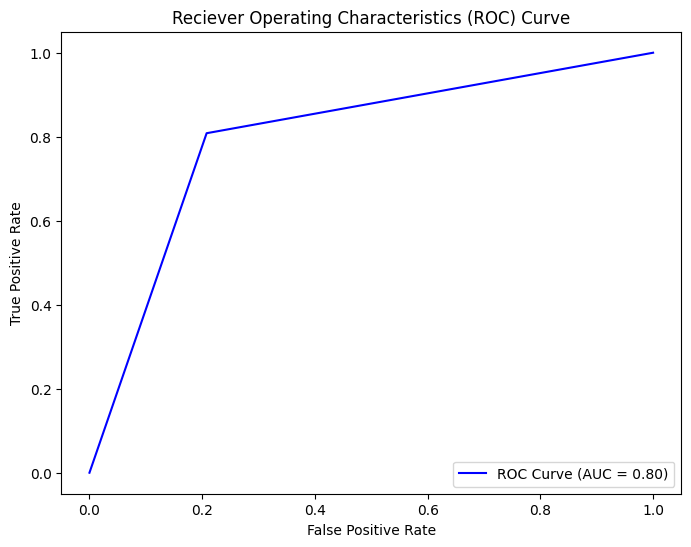

In [541]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label = f'ROC Curve (AUC = {auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristics (ROC) Curve')
plt.legend(loc='lower right')
plt.show()